In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from models.bin_sum_check import BinSumCheck

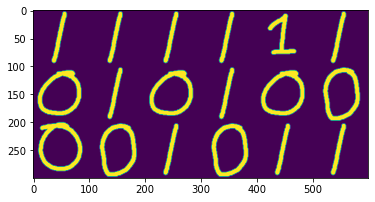

In [2]:
one_0 = cv.imread("data/one_0.png")[:, :, 0]
one_1 = cv.imread("data/one_1.png")[:, :, 0]
one_2 = cv.imread("data/one_2.png")[:, :, 0]
zero_0 = cv.imread("data/zero_0.png")[:, :, 0]
zero_1 = cv.imread("data/zero_1.png")[:, :, 0]
zero_2 = cv.imread("data/zero_2.png")[:, :, 0]

upper_term = cv.hconcat([one_0, one_0, one_0, one_0, one_1, one_0])
lower_term = cv.hconcat([zero_0, one_0, zero_0, one_0, zero_0, zero_1])
result = cv.hconcat([zero_2, zero_1, one_0, zero_1, one_0, one_0])

addition = cv.vconcat([upper_term, lower_term, result])/255

plt.imshow(addition)

In [3]:
ones = np.array([one_0, one_1, one_2])/255
zeros = np.array([zero_0, zero_1, zero_2])/255

train_data = [(zeros, "0"), (ones, "1")]

In [4]:
objects = {
    "0": (1, 1),
    "1": (1, 1),
    "-1": (1, 1),
    "00_col": (2, 1),
    "01_col": (2, 1),
    "10_col": (2, 1),
    "11_col": (2, 1),
    "empty_col": (2, 1),
    "fine_col": (3, 1),
    "border": (3, 1),
    "needs_transition_col": (3, 1),
    "transition_applied_col": (3, 1),
    "blocked": (3, 2),
    "fine_image": (3, 2)
}

rules = [
    ("vconcat", ["0", "0"], "00_col", False),
    ("vconcat", ["0", "1"], "01_col", False),
    ("vconcat", ["1", "0"], "10_col", False),
    ("vconcat", ["1", "1"], "11_col", False),
    ("vconcat", ["-1", "-1"], "empty_col", False),
    
    ("vconcat", ["00_col", "0"], "fine_col", True),
    ("vconcat", ["01_col", "1"], "fine_col", True),
    ("vconcat", ["10_col", "1"], "fine_col", True),
    ("vconcat", ["empty_col", "-1"], "border", True),
    
    ("vconcat", ["11_col", "1"], "needs_transition_col", False),
    ("vconcat", ["11_col", "1"], "transition_applied_col", False),
    
    ("vconcat", ["11_col", "0"], "needs_transition_col", True),
    ("vconcat", ["10_col", "0"], "needs_transition_col", True),
    
    ("vconcat", ["01_col", "0"], "transition_applied_col", True),
    ("vconcat", ["00_col", "1"], "transition_applied_col", True),  
    
    ("hconcat", ["border", "needs_transition_col"], "fine_image", False),
    ("hconcat", ["transition_applied_col", "needs_transition_col"], "fine_image", False),
    ("hconcat", ["needs_transition_col", "needs_transition_col"], "fine_image", False),
    
    ("hconcat", ["border", "fine_col"], "fine_image", False),
    ("hconcat", ["fine_col", "fine_col"], "fine_image", False),
    
    ("hconcat", ["fine_col", "needs_transition_col"], "blocked", True),
    ("hconcat", ["transition_applied_col", "fine_col"], "blocked", True),
    ("hconcat", ["transition_applied_col", "border"], "blocked", True)
]

In [5]:
bsc = BinSumCheck(train_data, rules, objects, 
                  final_symbol="fine_image", 
                  transition_symbol="needs_transition_col", 
                  early_stopping_symbol="blocked")

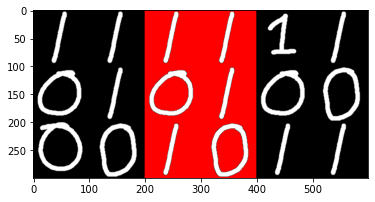

Addition is incorrect!


In [6]:
rm, tr, markup = bsc.predict(addition)
bsc.draw_results(addition, rm, tr)